<a href="https://colab.research.google.com/github/Sadiatumpa60/NLP/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import string
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_original = pd.read_csv('/content/drive/MyDrive/Natural Language Processing/Language Detection.csv')
df_original.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


cleaning data

In [ ]:
def remove_pun(text):
  for pun in string.punctuation:
    text = text.replace(pun,"") # remove all the punctions
  text = text.lower() # make everything into lower case 
  return (text) 

In [ ]:
 remove_pun('"Nature" can refer to the phenomena of the phy...	') #checking whether the function is working or not

'nature can refer to the phenomena of the phy\t'

In [ ]:
df_original['Text']=df_original['Text'].apply( remove_pun)

Splitting the data into Test & Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_original.iloc[:,0] # all rows and 0th columns
Y = df_original.iloc[:,1] # all rows and the 1st columns

In [ ]:
X

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4        1 the word nature is borrowed from the old fre...
                               ...                        
10332    ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333    ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334    ಹೇಗೆ  ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335    ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...
10336    ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...
Name: Text, Length: 10337, dtype: object

In [ ]:
Y

0        English
1        English
2        English
3        English
4        English
          ...   
10332    Kannada
10333    Kannada
10334    Kannada
10335    Kannada
10336    Kannada
Name: Language, Length: 10337, dtype: object

MOnte Carlo Validation

*SVM LInear*

In [ ]:
from sklearn import feature_extraction
from sklearn.svm import SVC

vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2),analyzer ='char')# (1,2)is define for pi gram



In [ ]:
from sklearn import pipeline

model_pipe = pipeline.Pipeline([('vec',vec),('clf',SVC(kernel="linear"))])

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import ShuffleSplit,cross_val_score

from sklearn import datasets

In [ ]:
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=5)
scores=cross_val_score(model_pipe,X,Y,cv=shuffle_split,scoring="accuracy")
print("Test Accuracy Score :{}".format(scores.mean()))

Test Accuracy Score :0.9789168278529982


*Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline
model_pipe = pipeline.Pipeline([('vec',vec),('clf', LogisticRegression())])

In [ ]:
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=5)
scores1=cross_val_score(model_pipe,X,Y,cv=shuffle_split,scoring="accuracy")
print("Test Accuracy Score :{}".format(scores1.mean()))

Test Accuracy Score :0.9743391360412635


*Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
model_pipe1 = pipeline.Pipeline([('vec',vec),('clf', RandomForestClassifier())])

In [ ]:
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=5)
scores11=cross_val_score(model_pipe1,X,Y,cv=shuffle_split,scoring="accuracy")
print("Test Accuracy Score :{}".format(scores11.mean()))

Test Accuracy Score :0.9630560928433269


*SVM rbf*

In [ ]:
from sklearn.svm import SVC

model_pipe = pipeline.Pipeline([('vec',vec),('clf',SVC(kernel="rbf"))])

In [ ]:
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=5)
scores111=cross_val_score(model_pipe,X,Y,cv=shuffle_split,scoring="accuracy")
print("Test Accuracy Score :{}".format(scores111.mean()))

Test Accuracy Score :0.9789168278529979


HoldOut Validation

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2)


Note
string can not be taken from the ml model.So we should done some vectorization over there.

In [ ]:
from sklearn import feature_extraction

from sklearn.svm import SVC

In [ ]:
vec = feature_extraction.text.TfidfVectorizer(ngram_range=(1,2),analyzer ='char')# (1,2)is define for pi gram

Pineline
we used when you 1st converting your tet to vector

SVM Linear

In [ ]:
from sklearn import pipeline

model_pipe = pipeline.Pipeline([('vec',vec),('clf',SVC(kernel="linear"))])


In [ ]:
model_pipe.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', SVC(kernel='linear'))])

In [ ]:
model_pipe.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [ ]:
predict = model_pipe.predict(X_test)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(Y_test,predict)

0.9811411992263056

In [ ]:
model_pipe.predict(['My name is ']) # this model can predict accurately

array(['English'], dtype=object)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import pipeline
model_pipe = pipeline.Pipeline([('vec',vec),('clf', LogisticRegression())])


In [ ]:
model_pipe.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', LogisticRegression())])

In [ ]:
predict = model_pipe.predict(X_test)

In [ ]:
from sklearn import metrics

metrics.accuracy_score(Y_test,predict)

0.9787234042553191

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
model_pipe = pipeline.Pipeline([('vec',vec),('clf', RandomForestClassifier())])

In [ ]:
model_pipe.fit(X_train,Y_train)

In [ ]:
predict = model_pipe.predict(X_test)

from sklearn import metrics

metrics.accuracy_score(Y_test,predict)

0.9671179883945842

SVM rbf

In [ ]:
from sklearn.svm import SVC

model_pipe = pipeline.Pipeline([('vec',vec),('clf',SVC(kernel="rbf"))])


In [ ]:
model_pipe.fit(X_train,Y_train)

Pipeline(steps=[('vec', TfidfVectorizer(analyzer='char', ngram_range=(1, 2))),
                ('clf', SVC())])

In [ ]:
predict = model_pipe.predict(X_test)

In [ ]:
predict = model_pipe.predict(X_test)

from sklearn import metrics

metrics.accuracy_score(Y_test,predict)

0.9821083172147002

Bar Diagram for the accuray of the model

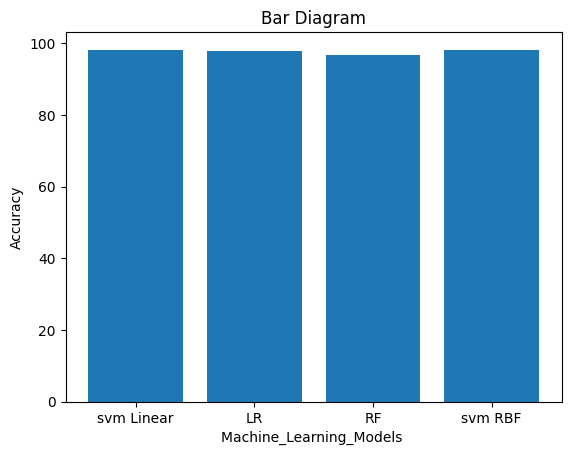

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
   
Machine_Learning_Models = ['svm Linear','LR','RF','svm RBF']
Accuracy = [98.11,97.87,96.71,98.21]
  


plt.bar(Machine_Learning_Models,  Accuracy )
plt.title('Bar Diagram')
plt.xlabel('Machine_Learning_Models ')
plt.ylabel('Accuracy')
plt.show()